In [134]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [135]:
data = loadmat('ex3data1.mat')

In [136]:
X = data['X']
y = data['y']

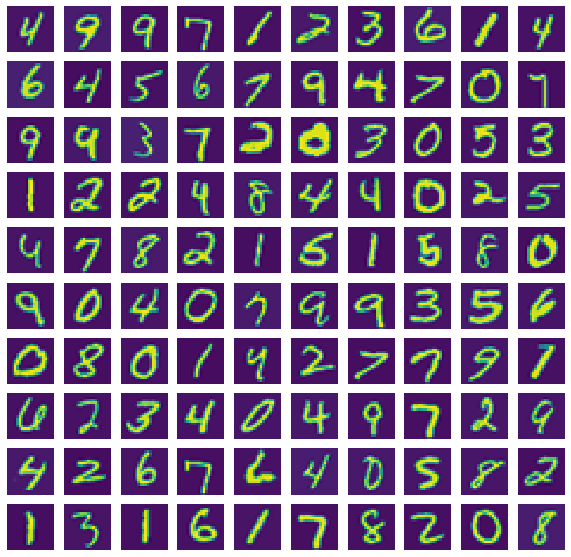

In [137]:
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))          
       axarr[i,j].axis('off')

In [138]:
m = len(y)
X = np.hstack((np.ones((m, 1)), X))
m, n  = X.shape

In [139]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [140]:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta))
    temp1 = np.multiply(y, np.log(temp)) 
    temp2 = np.multiply(1-y, np.log(1-temp))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [141]:
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [142]:
k = 10

In [143]:
theta = np.zeros((k, n))
lmbda = 0.1

In [144]:
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, 
                           args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.013663
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.057556
         Iterations: 50
         Function evaluations: 141
         Gradient evaluations: 141
         Current function value: 0.061951
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037393
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.061739
         Iterations: 50
         Function evaluations: 135
         Gradient evaluations: 135
         Current function value: 0.020027
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033394
      

In [146]:
pred = np.argmax(np.dot(X, theta.T), axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

95.1